# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file. 

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Human health is a precarious thing, unfortunate events can happen in the blink of an eye. What's even worse is knowing you'll have a big bill, yet you don't know how big it will be. That's why, in this assignment, I will be using a data set from kaggle to predict medical expenses. 

The data set has 7 features:
*   age: age of primary beneficiary

*   sex: insurance contractor gender, female, male

*   bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

*   children: Number of children covered by health insurance / Number of dependents

*   smoker: Smoking

*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*   charges: Individual medical costs billed by health insurance 


Using these categories and the Gradient Descent method, I will contstruct a model that will be able to better inform patients on the bill they will recieve.

In [ ]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
insurance = pd.read_csv("sample_data/insurance.csv")

insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Dataset has 7 total features, 3 of which are categorical (sex, smoker, and region).

In [ ]:
size = os.path.getsize('sample_data/insurance.csv')
print(size)

55628


The size of the dataset that I'm using is 55628 bytes, or .053 MB. This is a large enough set to make decent preditions nationwide.



In [ ]:
sample_incomplete_rows = insurance[insurance.isnull().any(axis=1)]
sample_incomplete_rows

,age,sex,bmi,children,smoker,region,charges


There don't appear to be any missing values in the dataset.

In [ ]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Dataset has 1338 entries, other basic statistics are shown above.

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING 

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [ ]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

# Your code goes here for this section.

# Split the data into train set (80%) and test set (20%)
env = insurance.drop(['charges'], axis = 1)
target = insurance['charges']
X_train, X_test, y_train, y_test = train_test_split(env,target, test_size = 0.2, random_state = 42)

#print(X_train, X_test, y_train, y_test)

Testing the OneHotEncoder before implementing it in my pipeline

In [ ]:
insurance_sex = insurance[["sex"]]
insurance_smoker = insurance[["smoker"]]
insurance_region = insurance[["region"]]

sex_encoder = OneHotEncoder(sparse=False)
smoker_encoder = OneHotEncoder(sparse=False)
region_encoder = OneHotEncoder(sparse=False)

insurance_1hot_sex = sex_encoder.fit_transform(insurance_sex)
insurance_1hot_smoker = smoker_encoder.fit_transform(insurance_smoker)
insurance_1hot_region = region_encoder.fit_transform(insurance_region)

print(insurance_1hot_sex)
print(insurance_1hot_smoker)
print(insurance_1hot_region)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [ ]:
print(sex_encoder.categories_)
print(smoker_encoder.categories_)
print(region_encoder.categories_)

[array(['female', 'male'], dtype=object)]
[array(['no', 'yes'], dtype=object)]
[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]


Creating my pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

insurance_num = X_train.drop(["sex", "smoker", "region"], axis=1)

encode = ["sex", "smoker", "region"]
num_attribs = list(insurance_num)

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), encode),
    ])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [ ]:
print(X_train.shape)
print(X_train_prepared.shape)

(1070, 6)
(1070, 11)


5 'new' features accounting for the encoded categorical data.

In [ ]:
insurance_num_test = X_test.drop(["sex", "smoker", "region"], axis=1)

encode = ["sex", "smoker", "region"]
num_attribs = list(insurance_num_test)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), encode),
    ])

X_test_prepared = full_pipeline.fit_transform(X_test)

In [ ]:
X_test_prepared

array([[ 0.45859585, -0.93715188,  0.82250933, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18713281, -0.16752679, -0.89961958, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.82180078, -0.66551949, -0.89961958, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.04363755, -0.48443124, -0.03855512, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.1043245 ,  2.59486336, -0.89961958, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.88908162,  0.49646348, -0.03855512, ...,  0.        ,
         0.        ,  1.        ]])

I've run all my training and testing data through the full pipeline in order to encode the categorical data and normalize all the categories using StandardScaler; therefore the data is ready for the algorithm.

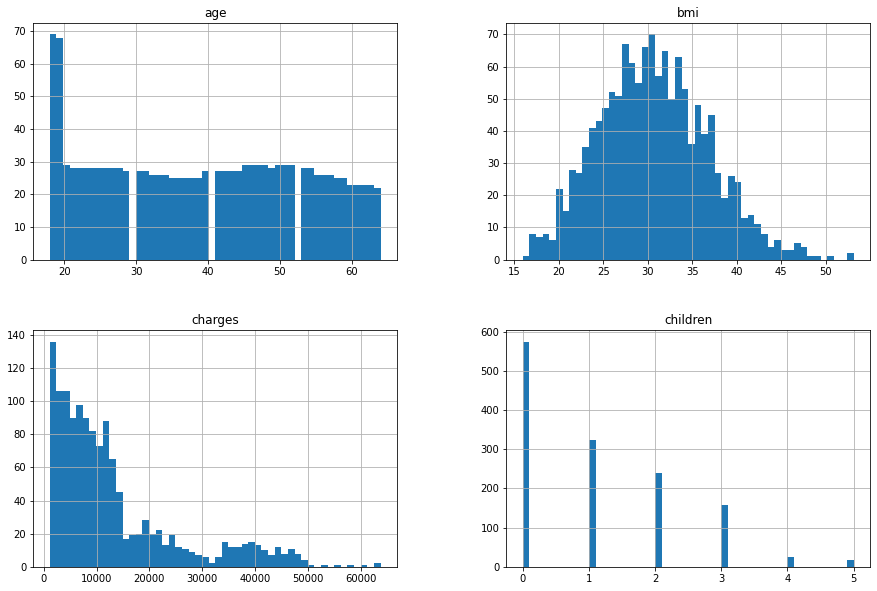

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=(15,10))
plt.show()

The histograms show that we have oddly shaped data all over. BMI are normally distributed as they should be. Both children and charges have tails that drag at the higher end of the x-axis, which makes sense but may require some cleaning up. The ages seem to be constantly distributed with a spike in young people.

In [ ]:
corr_matrix = insurance.corr()
corr_matrix.shape
corr_matrix["charges"].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda5ef32710>,
      dtype=object)

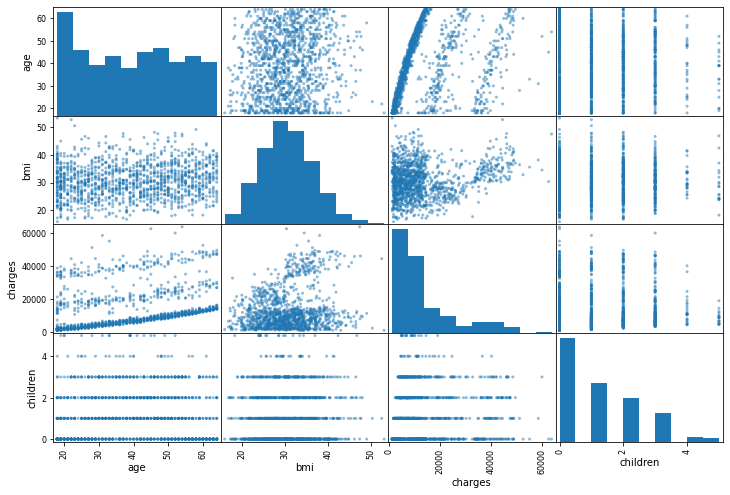

In [ ]:
attributes = ["age", "bmi", "charges", "children"]
scatter_matrix(insurance[attributes], figsize=(12, 8))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


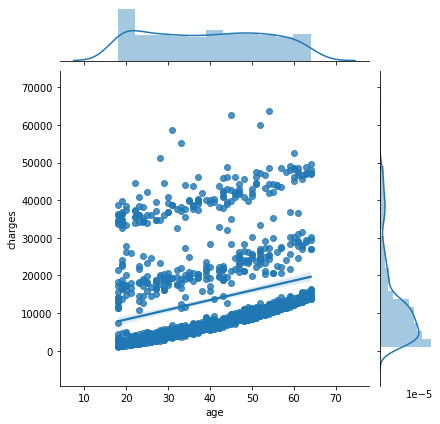

In [ ]:
import seaborn as sns

sns.jointplot(x=insurance['age'], y=insurance['charges'], data=insurance, kind='reg')

*  From the correlation matrix and the correlation graphs above, we can see that age is positively correlated with the charges. Maybe this is due to older folks having more serious injuries or needing more detailed attention?  
*  We can also see there is low positive correlation between BMI and charges. This may be due to obesity casuing complications that wouldn't have occured otherwise. 
*  We can't efficiently display the encoded categorical data, but I have a strong feeling that both the sex and smoker data are highly correlated with the charges recieved.

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT 
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [ ]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self):
    """
    Initialize the regressor
    """
    self.theta = np.zeros(shape=(1,11)); # parameter vector;
    self.alpha = 0.1; # learning rate
    self.cost  = []; # cost function  

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT: 
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here

    #initializing cost vector and calculating m
    cost = np.zeros(iters)
    m = len(X_train)

    # This loop goes for the specified number of iterations
    # And calculates the gradient given teh CURRENT theta vector
    # It then uses this new gradient to find a new and imporved value of theta
    # Then it updates the cost function vector at the specified index for the new value of theta
    for i in range(iters):
      gradients = 2/m * X_train.T.dot(X_train.dot(theta.ravel()) - y_train)
      theta = theta - alpha * gradients
      inner = np.power(((X_train.dot(theta.T.ravel()))-y_train),2)
      cost[i] = np.sum(inner) / (len(X_train))

    return theta, cost

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    # implementation code here

    #This method sets the global theta and cost variables by calling gradientDescent
    #1000 iterations is plenty to find the right value and STAY at the right value
    self.theta, self.cost = self.gradientDescent(X_train, y_train, self.theta, self.alpha, 1000)

  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    #Adding the column of zeros for the bias term
    X_train_zero = np.c_[np.ones((1070, 1)), X_train] #add x0 = 1

    #implementing the normal equation that was given in class, this sets the global theta
    theta_best = np.linalg.inv(X_train_zero.T.dot(X_train_zero)).dot(X_train_zero.T).dot(y_train)
    
    self.theta = theta_best;

  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here 

    #This multiplies our test data with the best theta we found to predict the y values
    y_predict = np.dot(X_test, self.theta.ravel())
    return y_predict

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    return ("Parameter vector is %f" % self.theta)
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train_prepared, y_train)   

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

In [ ]:
cost_alpha_1 = myGradientDescentModel.cost #alpha = 0.1

In [ ]:
cost_alpha_2 = myGradientDescentModel.cost #alpha = 1

In [ ]:
cost_alpha_3 = myGradientDescentModel.cost #alpha = 0.01

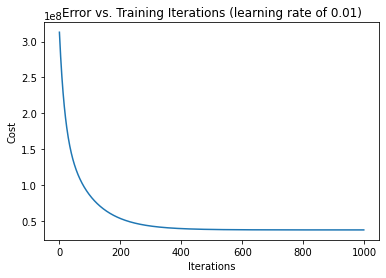

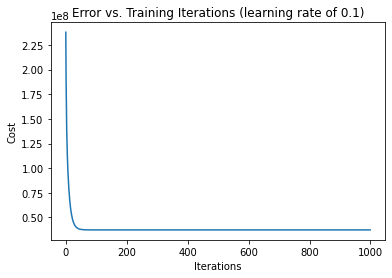

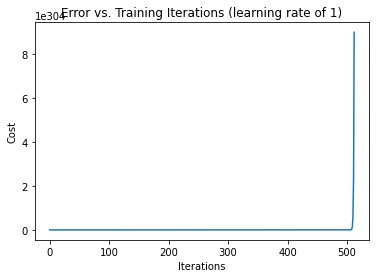

In [ ]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations (learning rate of 0.01)')  
plt.plot(range(1000),cost_alpha_3)
plt.show()

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations (learning rate of 0.1)')  
plt.plot(range(1000),cost_alpha_1)
plt.show()

plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations (learning rate of 1)')  
plt.plot(range(1000),cost_alpha_2)
plt.show()


From the graphs displayed above, 0.1 seems to be a perfect learning rate for my model. It converges sharply, as opposed to the slower, smoother curve for a learning rate of 0.01. It doesn't jump too quickly and diverge to get the wrong answer like a learning rate of 1.

- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [ ]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:

#see step 3 for implementation
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train_prepared, y_train)

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS 

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train_prepared,y_train)
y_predict = mySGDModel.predict(X_test_prepared)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("Sklearn built in stochastic gradient descent model RMSE: ", mySGDModel_rmse, "\n")

y_predict_mine = myGradientDescentModel.predict(X_test_prepared)
mse_mine = mean_squared_error(y_test, y_predict_mine)
mySGDModel_rmse_mine = np.sqrt(mse_mine)
print("My own implementation of gradient descent model RMSE: ", mySGDModel_rmse_mine, "\n")

X_test_prepared_norm = np.c_[np.ones((268, 1)), X_test_prepared]
y_predict_norm = myNormalEquationModel.predict(X_test_prepared_norm)
mse_norm = mean_squared_error(y_test, y_predict_norm)
mySGDModel_rmse_norm = np.sqrt(mse_norm)
print("My own implementation of normal equation model RMSE: ", mySGDModel_rmse_norm, "\n")

# myGradientDescentModel_rmse  
# myNormalEquationModel_rmse 



Sklearn built in stochastic gradient descent model RMSE:  5794.611466807258 

My own implementation of gradient descent model RMSE:  5795.33253301876 

My own implementation of normal equation model RMSE:  9462.247104641756 



*  The model that had the best prediction was the gradient descent model

*  The built in Stochastic Gradient Descent model and my implementation were very close. They both a little less than 5800, which is pretty good for the scale that the charges are on. 

*  My normal equation model had almost twice the amount of error. This isn't great, but 9500 still isn't terrible relative to the scale of the charges either.

- - -
## Task 6. PRESENT YOUR SOLUTION 

In order to predict the medical bill charged by insurance I took an iterative approach. I implemented gradient descent optimization in order to incrementally improve my predictions and tweaked the number of iterations needed as well as the learning rate. The result was a trained model that can accurately predict medical bills within about \$5000. Compared to the order of medical bills, some exceeding \$60,000 in this data set, I would say that's impressive and reliable. From exploring the problem I have found medical bills can be variable; but if you use the correlation with age, smoking, and bmi coupled with time you can accurately predict them. As an improvement upon this model I could extend it to weigh different features more heavily which may lead to even lower errors and more precise predictions.

say somethig about were data was grabbed from

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!